**Discussion Related With Outliers And Impact On Machine Learning!!**

**Which Machine LEarning Models Are Sensitive To Outliers?**
1. Naivye Bayes Classifier---- Not Sensitive to Outliers or both 
2. SVM ---- Not Sensitive to outliers
3. Linear Regression ----  Sensitive to Outliers
4. Logistic Regression---- Sensitive to Outliers
5. Decision Tree Regressor or Classifier ---- not Sensitive
6. Ensemble(RF,Xgboost,GB)------ Not Sensitive
7. LDA --- Sensitive
8. KNN ---- sensitive to  outliers or both
9. Kmeans ------- Sensitive
10. Hierarichal--------Sensitive
11. PCA-----------Sensitive
12. Neural Networks------Sensitive

**Outliers**

Outliers are the data points which are completely different from other data points or record.

outliers are also very much important for some of the use cases or for some cases it is very harmful

like age:10,15,18,19,20,22,23,12,15,18,20,22,100,101,102

In [1]:
import pandas as pd,numpy as np

In [2]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df["Age"].isnull().sum()

177

In [4]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


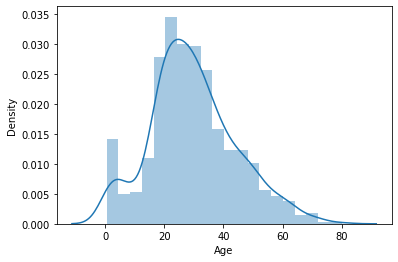

In [6]:
sns.distplot(df["Age"].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


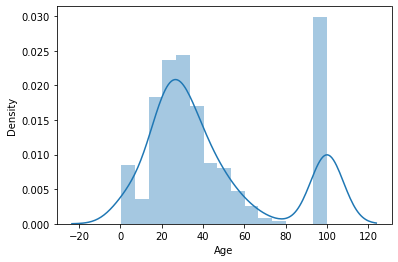

In [8]:
#filling the higher number
sns.distplot(df["Age"].fillna(100))

if we have normal distribution at that time we use estimate outliers or extreme value analysis and we use different formulae to find IQR but it our data is skewed the we use some different technique

**Gaussian Distributed**

Text(0, 0.5, 'No.of passengers')

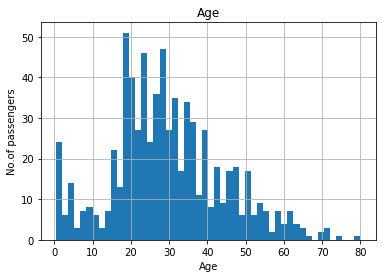

In [14]:
fig = df["Age"].hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("No.of passengers")

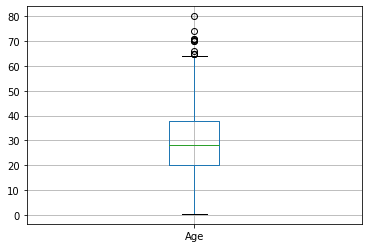

In [15]:
fig = df.boxplot(column="Age")

In [16]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**If the Data is Normally  Distributed we use this**

Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

In [26]:
upper_bound = df["Age"].mean()+3*df["Age"].std()
print(f'upper bound is:{upper_bound}')
lower_bound = df["Age"].mean()-3*df["Age"].std()
print(f'lower bound is:{lower_bound}')
print(f'the mean of age is',round(df["Age"].mean(),2))

upper bound is:73.27860964406094
lower bound is:-13.880374349943303
the mean of age is 29.7


**In gaussian distribution anything after upper bound and lower bound is outliers**

In [31]:
outliers = df[(df["Age"]<lower_bound) | (df["Age"]>upper_bound)]
outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


**When the Features are skewed use this**

Text(0, 0.5, 'Price')

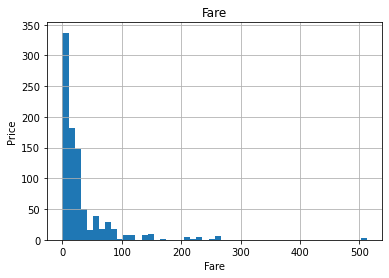

In [39]:
fig = df["Fare"].hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("Price")

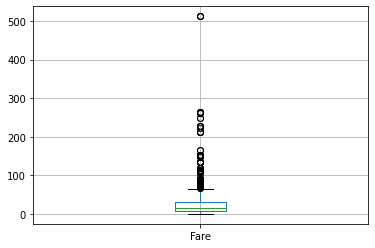

In [41]:
df.boxplot(column="Fare")

In [42]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
iqr = df.Fare.quantile(0.75)-df["Fare"].quantile(0.25)
print(iqr)

23.0896


In [52]:
lower_bridg = df["Fare"].quantile(0.25)-(iqr*1.5)
upper_bridg = df["Fare"].quantile(0.75)+(iqr*1.5)
print(lower_bridg),print(upper_bridg)

-26.724
65.6344


(None, None)

In [47]:
#extreme outliers
lower_bridge = df["Fare"].quantile(0.25)-(iqr*3)
upper_bridge = df["Fare"].quantile(0.75)+(iqr*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [48]:
data=df.copy()

In [51]:
#if the age data is greater than upper_bound then replace all the data with upper bound value 
data.loc[data["Age"]>upper_bound,"Age"]=upper_bound

In [54]:
#if the Fare data is greater than upper_bridge then replace all the data with upper_bridge value 
data.loc[data["Fare"]>upper_bridge,"Fare"]=upper_bridge

Text(0, 0.5, 'Price')

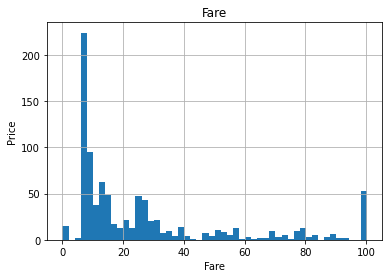

In [55]:
fig = data["Fare"].hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("Price")

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [57]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.664179104477612
roc_auc_score: 0.7129340277777777
